# MNIST from scratch with numpy

In [1]:
# load changed modules automatically
%reload_ext autoreload
%autoreload 2

In [2]:
# load numpy
import numpy as np

# load dataloaders and required layers
from mnist import dataloader
from mnist.layers import Softmax, Linear, Dropout, ReLU
from mnist.losses import CrossEntropy

# load pyplot for displaying images
from matplotlib import pyplot as plt

# show images inline on notebook
%matplotlib inline

# debugging
import pdb

## Load training data

In [3]:
dl = dataloader.DataLoader()
((x_train, y_train), (x_valid, y_valid), (x_test, (y_test))) = dl.load_data()

In [4]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

## Normalize data

In [5]:
(x_train, y_train), (x_valid, y_valid) = dl.normalize(((x_train, y_train), (x_valid, y_valid)))

## Exploring the data

In [11]:
def show(img):
    plt.imshow(img, cmap="gray")

In [12]:
valid_images = np.reshape(x_valid, (-1,28,28))

In [ ]:
show(valid_images[0])

## Start building the model

In [6]:
def shuffle(arr1, arr2):
    random_idxs = np.arange(len(arr1))
    np.random.shuffle(random_idxs)
    return x_train[random_idxs], y_train[random_idxs]

In [7]:
# always reproduce the same weights
np.random.seed(1)

class Net(object):
    def __init__(self):
        self.train = True
        self.input_layer = Linear(28*28, 10) # linear layer with bias
        self.softmax = Softmax()
        self.dropout = Dropout(0.8)
        self.cross_entropy = CrossEntropy()
    
    def forward(self, x):
        if self.train:
            x = self.dropout.forward(x)

        x = self.input_layer.forward(x)
        x = self.softmax.forward(x)
        return x
    
    def backward(self, predictions, y):
        grad_loss = net.softmax.backward(predictions, y)
        _, grad_input_layer, grad_bias = net.input_layer.backward(grad_loss)
        return grad_input_layer, grad_bias
    
    def loss(self, y_pred, y):
        return self.cross_entropy.loss(y_pred, y)

net = Net()

In [8]:
debug = False

if debug:
    n_epochs = 1
    batch_size = 3
else:
    n_epochs = 20
    batch_size = 256
    
learning_rate = 1e-1

for epoch in range(n_epochs):
    
    for i in range(0, len(x_train), batch_size):

        inputs = x_train[i:i+batch_size]
        targets = y_train[i:i+batch_size]
        
        inputs, targets = shuffle(inputs, targets)

        if debug:
            print("inputs.shape", inputs.shape)
            print("targets.shape", targets.shape)

        # forward propagation
        y_pred = net.forward(inputs)
        predictions = y_pred.copy()

        if debug:
            print("y_pred.shape:", y_pred.shape)
            print("predictions.shape", predictions.shape)
            
        # calculate cross-entropy loss
        loss = net.loss(predictions, targets)
        
        if debug:
            print(epoch, loss)
        
        # backpropagation        
        grad_input_layer, grad_bias = net.backward(predictions, targets)
        
        if debug:
            print("grad_input_layer.shape", grad_input_layer.shape)
            print("net.input_layer.weights.shape", net.input_layer.weights.shape)
            print("net.input_layer.bias.shape", net.input_layer.bias.shape)
        
        net.input_layer.weights -= learning_rate * grad_input_layer
        net.input_layer.bias -= learning_rate * grad_bias
        
        if debug:
            break
        
    # calculate validation loss for some random indices
    net.train = False
    random_idxs = np.random.randint(0, len(x_valid), batch_size)
    y_valid_pred = net.forward(x_valid[random_idxs])
    loss_valid = net.loss(y_valid_pred, y_valid[random_idxs])
    net.train = True
    
    #calculate accuracy and validation accuracy
    accuracy = np.mean(y_pred.argmax(axis=1) == targets)
    valid_accuracy = np.mean(y_valid_pred.argmax(axis=1) == y_valid[random_idxs])
    
    print(epoch, loss, loss_valid, accuracy, valid_accuracy)


0 0.24448745589456217 0.7250704680308275 0.9 0.78515625
1 0.2678010473263808 0.8249318496133424 0.9 0.796875
2 0.29367190753760114 0.6399052549460673 0.9125 0.828125
3 0.2031626469135543 0.960821130991464 0.925 0.76953125
4 0.3175400918884881 0.7460730697805749 0.8875 0.81640625
5 0.19044868753028937 0.9405618821977141 0.9125 0.77734375
6 0.1851131097974233 0.796294352013525 0.9375 0.83203125
7 0.1469066520257561 0.9537574536330944 0.95 0.796875
8 0.18294786687004044 0.8327363894245562 0.95 0.84375
9 0.11371112750016225 0.9466581825744765 0.975 0.80859375
10 0.21408967038593038 0.8659946562883748 0.925 0.80859375
11 0.1988773233856596 0.6723050405379363 0.925 0.8515625
12 0.17156010032208044 1.0133803311847793 0.9375 0.78125
13 0.21505484854899698 0.6588301368824367 0.9125 0.8125
14 0.30363388029933225 0.9129873371935626 0.9125 0.83203125
15 0.2648701102646583 0.9973765702531434 0.925 0.828125
16 0.2115346982144235 1.1574537113298349 0.925 0.79296875
17 0.25350815193781406 1.2490367192

## Check results

In [9]:
# get some random examples from validation data,
# compare predictions with actual values
valid_preds = net.forward(x_valid)
random_idxs = np.random.randint(0, len(x_valid), 10)
np.argmax(valid_preds, axis=1)[random_idxs], y_valid[random_idxs]

(array([7, 0, 4, 8, 4, 9, 8, 6, 6, 4]), array([7, 0, 4, 8, 4, 8, 8, 6, 2, 4]))

prediction: 3 correct: 3


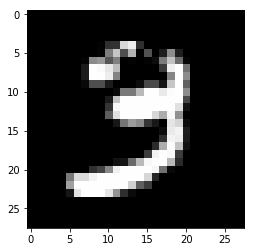

In [13]:
# display a random image from validation data with
# prediction and correct value
valid_images = np.reshape(x_valid, (-1,28,28))
valid_preds = net.forward(x_valid)
random_idx = np.random.randint(0, len(x_valid))
prediction = np.argmax(valid_preds, axis=1)[random_idx]
correct = y_valid[random_idx]
print("prediction:", prediction, "correct:", correct)
show(valid_images[random_idx])